# Úkol

Vašim cílem je vytvoření klasifikační neuronové sítě pro rozlišování různých druhů kosatců.

Budeme používat stejná stejná data jako v kapitole 5, můžete z ní vycházet.

Během zpracování tohoto úkolu bude postupně plnit tyto body

- Načtení dat a zobrazení základní statistiky
- Pro přípravu dat použijte binární encodování
- Vstupní hodnoty standardizujte pomocí StandardScaler
- Data si rozdělte na trénovací, testovací a validační

- Vytvořte model neurové sítě, nebojte se experimentovat s počtem skrytých vrstev a jejich velikostí
- Pravděpodobně budete potřebovat vrstvy Dense, můžete si vyzkoušet vrstvu Drop
- Jako aktivační funkce použijte relu, na výstupní vrstvu Softmax

- Při učení použijte nákladovou funkci categorical_crossentropy
- Optimalizační algoritmus bude ADAM
- Můžete sbírat další metriku accuracy

- Naučený model uložte do souboru

- Naučený model otestujte, zjištěte R2 a přesnost
- Vykreslete matici záměn

- Vykreslete historii učení

- Vyzkoušejte model na svých vstupních datech (vytvořte inferenci)

# Klasifikace datasetu IRIS pomocí ANN

Britský statistik a biolog Ronald Fisher publikoval v roce 1936 článek The use of multiple measurements in taxonomic problems jako příklad lineární diskriminační analýzy.

Dva ze tří druhů byly sbírány na poloostrově Gaspé "všechny ze stejné pastviny, sbírány ve stejný den a měřeny ve stejnou dobu stejnou osobou stejným přístrojem".

Soubor dat se skládá z 50 vzorků od každého ze tří druhů kosatce.

U každého vzorku byly změřeny čtyři znaky: délka a šířka kališních a okvětních lístků v centimetrech. 

Identifikace druhu kostace podle rozměrů různých okvětných lístků
- sepal - listy kalichu
- petal - okvětní lístek    

    https://en.wikipedia.org/wiki/Iris_flower_data_set
    https://www.kaggle.com/arshid/iris-flower-dataset

# 1. Načtení data a základní statistika
- náhled dat
- základní statistika
- NULL hodnoty

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Načtení dat
data = pd.read_csv('../dataset/IRIS.csv')

# Základní informace
print(data.head())
print(data.describe())
print(data.info())
print(data.isnull().sum())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeInd

# 2. Vizualizace dat
- rozložení distribuce hodnot

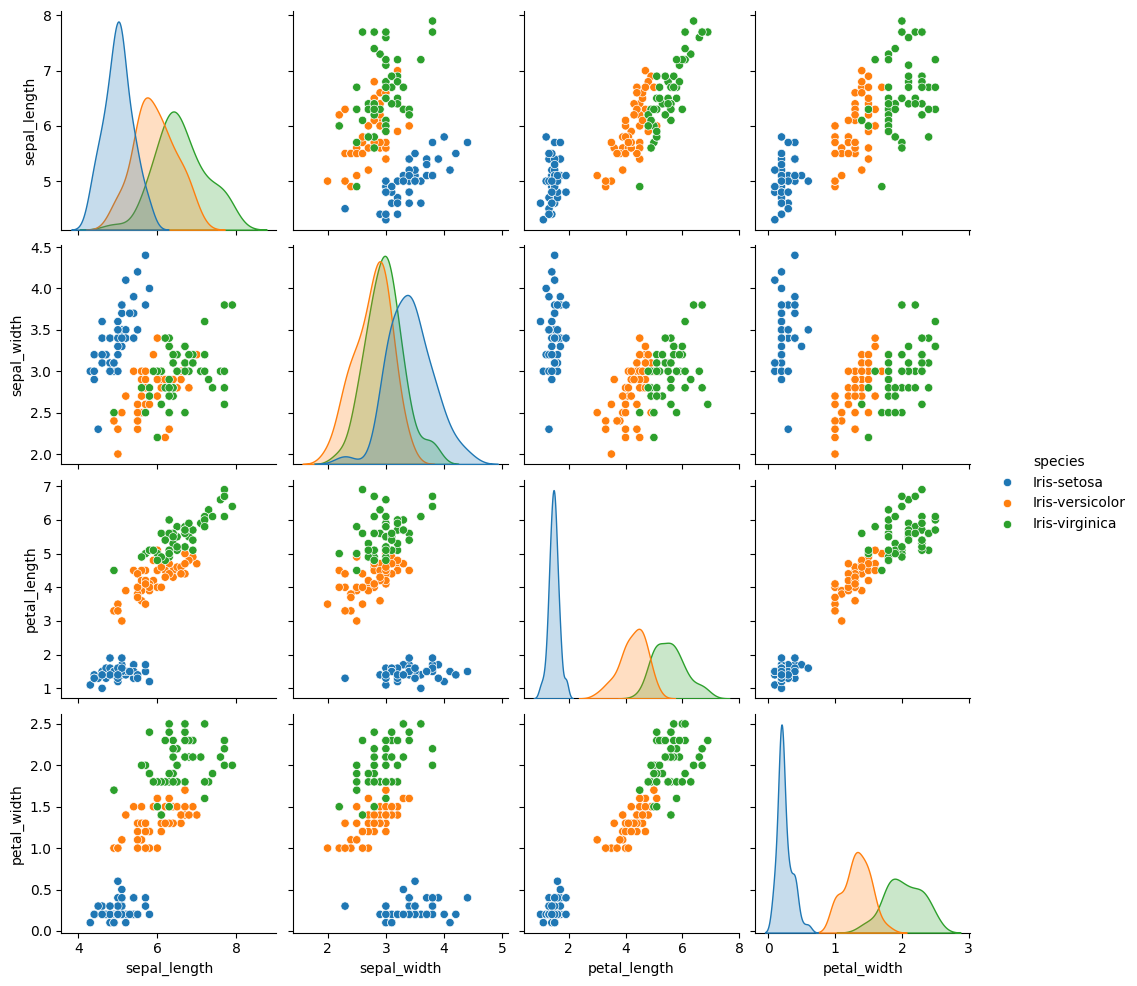

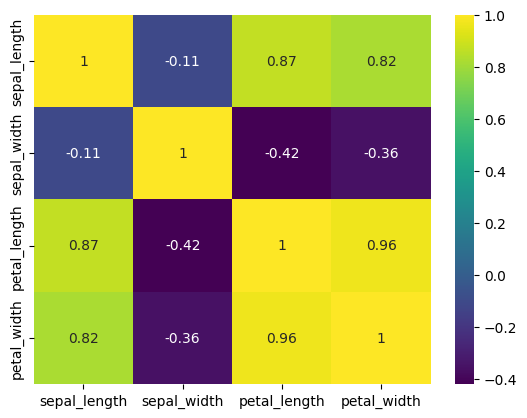

In [2]:
sns.pairplot(data, hue='species')
plt.show()

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()


# 3. Příprava dat
- binární encoding
- standardizace vstupních proměnných

In [3]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

# Rozdělení X a y
X = data.drop('species', axis=1)
y = data['species']

# Label binarizace
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardizace vstupů
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rozdělení na trénovací, validační a testovací sadu
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## 4 Modelování neuronové sítě

Model neuronové sítě
* Sekvenční model - data procházejí ze vstupní vrstvy přes skryté vrstvy do výstupní vrstvy.
* Dense vrstva propojuje každý neuron z předchozí vrstvy s každým neuronem ve vrstvě.
* Drop vrstva náhodně nastavuje vstupní jednotky na 0 v každém kroku během doby trénování, což pomáhá zabránit nadměrnému přizpůsobení.
* Používají se aktivační funkce RELU a Softmax. 
* Poslední funkce Softmax je použita ve výstupní vrstvě, protože tento projekt je klasifikační.

* Kompilace je posledním krokem při vytváření modelu.
* Optimalizátor, který používáme, je Adam. Adam je optimalizační algoritmus, který lze použít místo klasického postupu stochastického gradientního sestupu k iterativní aktualizaci vah sítě na základě trénovacích dat.
* Nákladová funkce - categorical_crossentropy, speciální ztrátová funkce pro klasifikaci (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).
* Během učení se počítá další metrika - Accuracy

Model: "sequential"
 Layer (type)                Output Shape              Param #   

 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 

Total params: 403

Trainable params: 403

Non-trainable params: 0

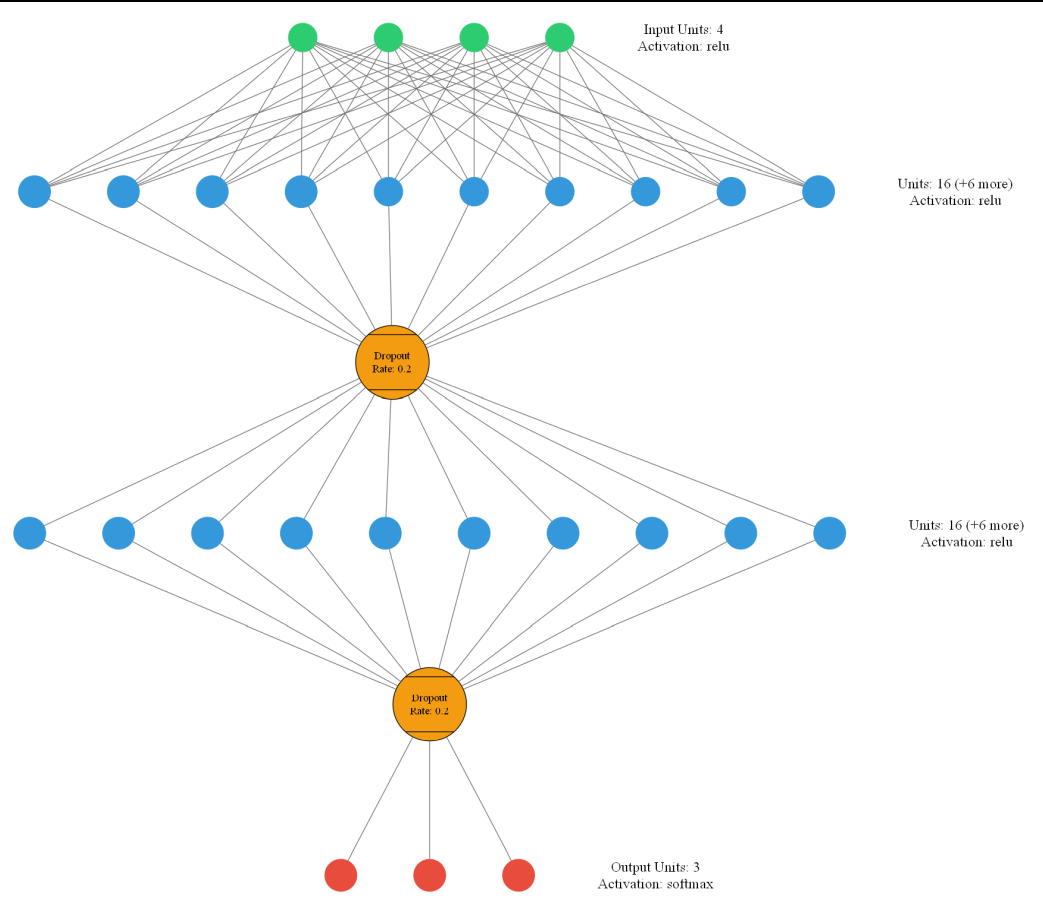

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Architektura modelu
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Kompilace
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Trénování
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)


c:\Users\Stanislav Kosař\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Uložení modelu

In [5]:
model.save('iris_model.h5')


# 6. Zobrazení historie učení

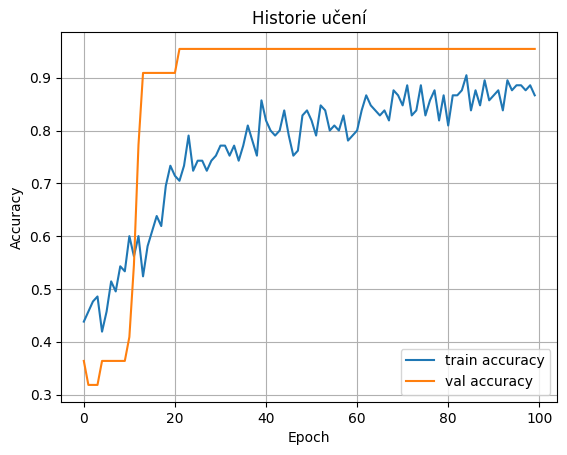

In [6]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Historie učení')
plt.show()


# 7. Ověření modelu
- predikce testovacích hodnot
- R2 skóre
- Přesnost
- Confusion matrix trénovacích a testovacích dat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Accuracy: 0.8260869565217391
R2 Score: 0.6912751677852349


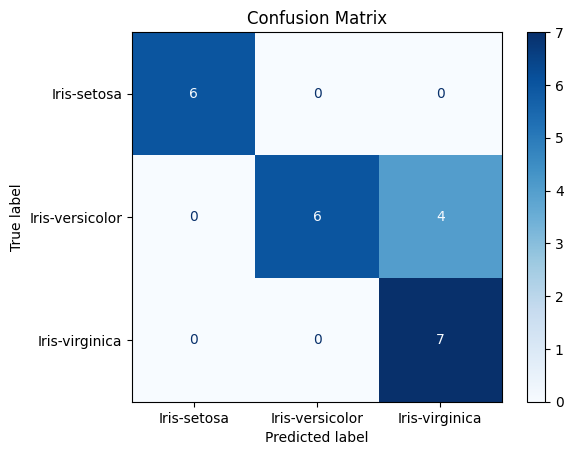

In [7]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predikce
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Přesnost a R2
print(f"Accuracy: {accuracy_score(y_true, y_pred_classes)}")
print(f"R2 Score: {r2_score(y_true, y_pred_classes)}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=encoder.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 8. Použití modelu

In [10]:
# Testovací vstup
test_input = scaler.transform([[1,2,1,2]])
test_predictions = model.predict(test_input)

print(f"Iris setosa:     {test_predictions[0][0]}")
print(f"Iris versicolor: {test_predictions[0][1]}")
print(f"Iris virginica:  {test_predictions[0][2]}")

# Nejpravděpodobnější druh
print("Predikce druhu:", encoder.classes_[np.argmax(test_predictions)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Iris setosa:     0.7955611348152161
Iris versicolor: 0.2042466104030609
Iris virginica:  0.0001921949296956882
Predikce druhu: Iris-setosa


c:\Users\Stanislav Kosař\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
